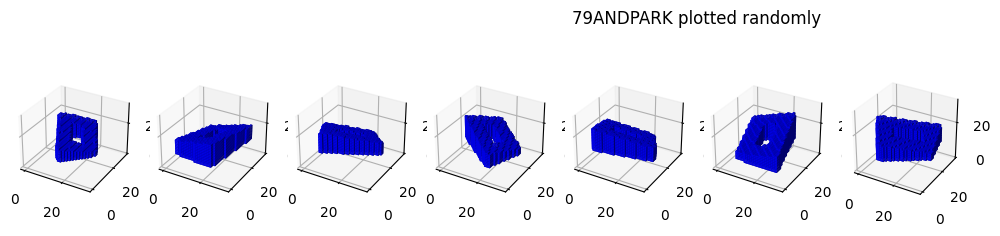

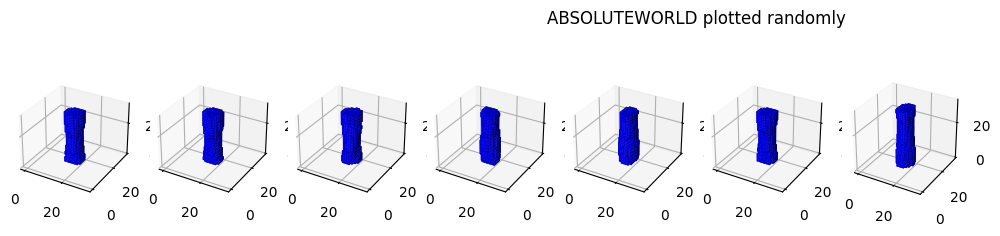

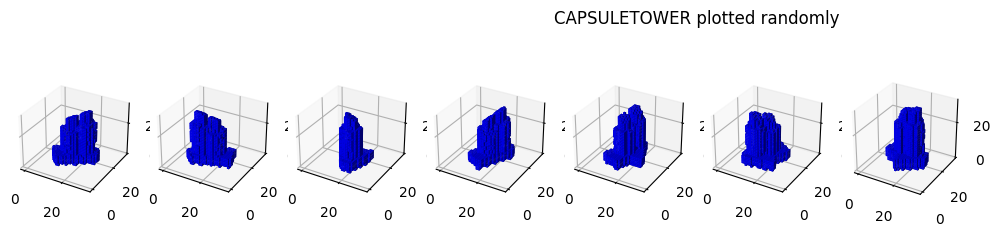

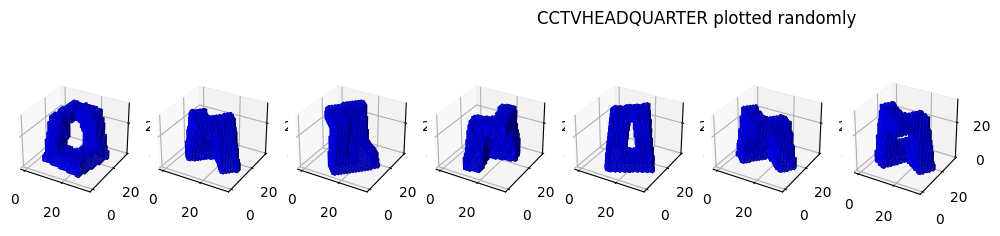

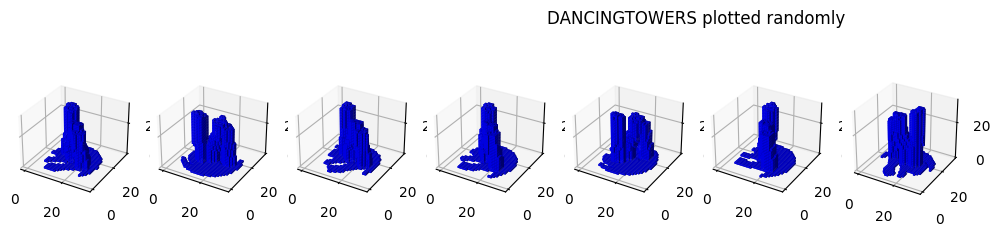

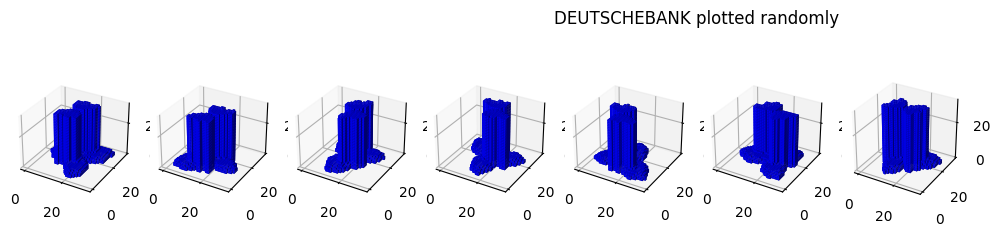

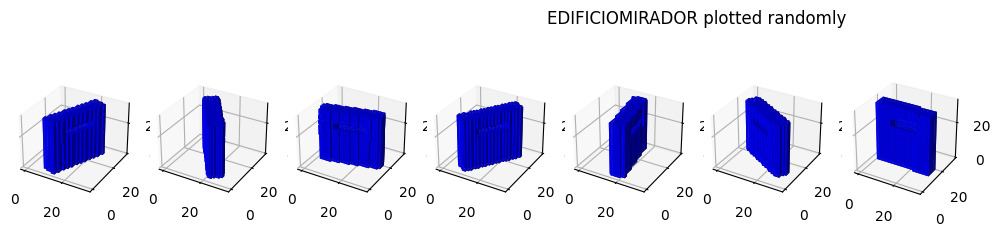

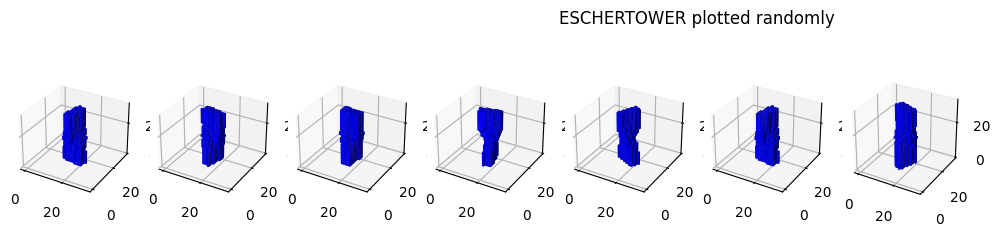

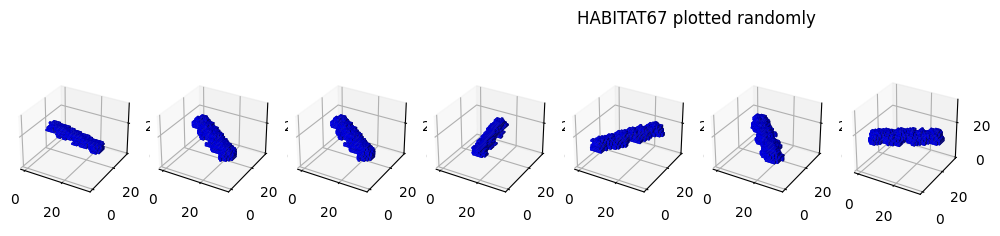

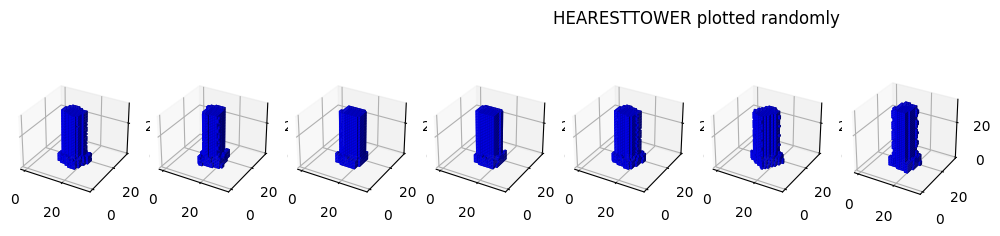

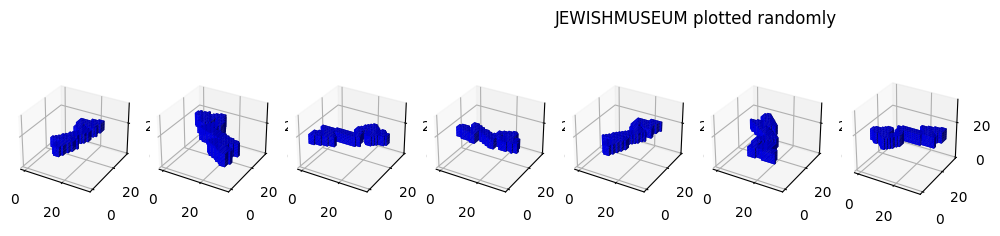

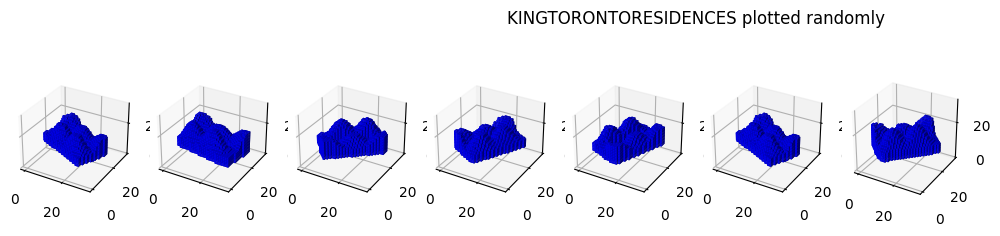

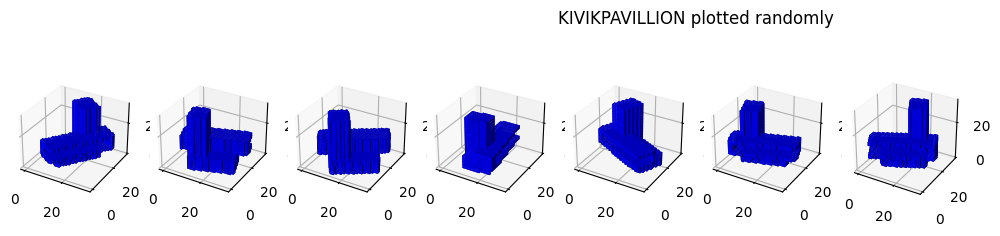

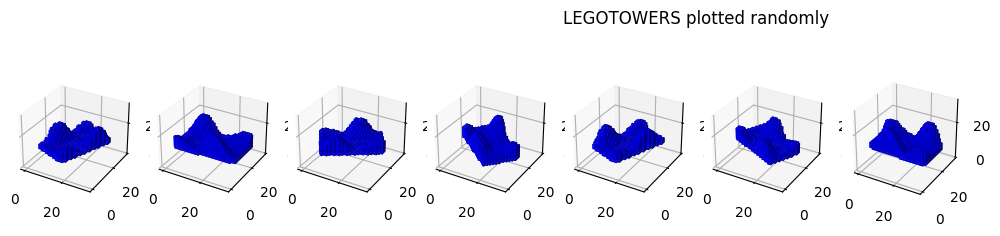

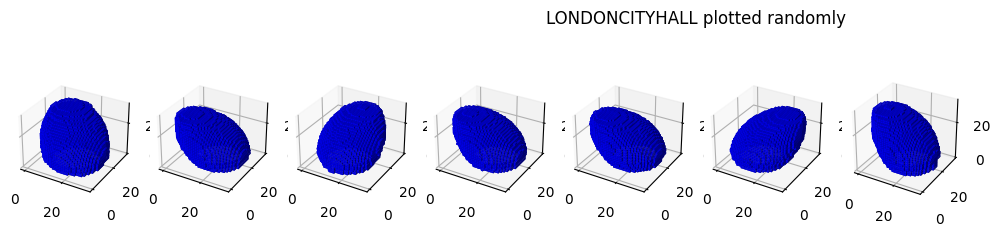

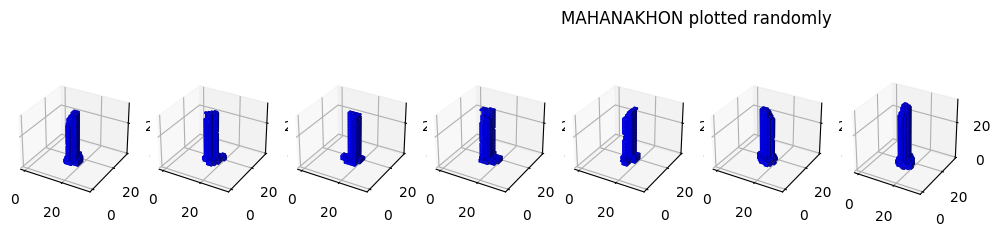

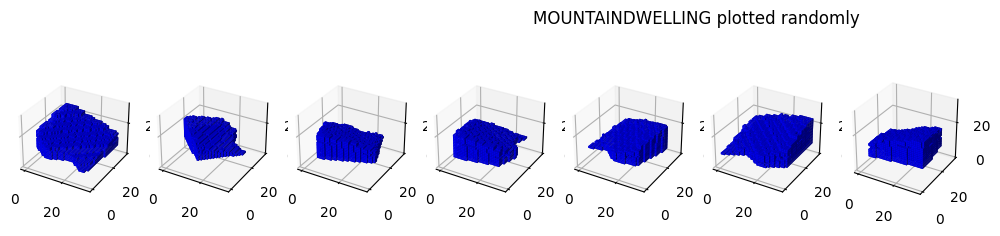

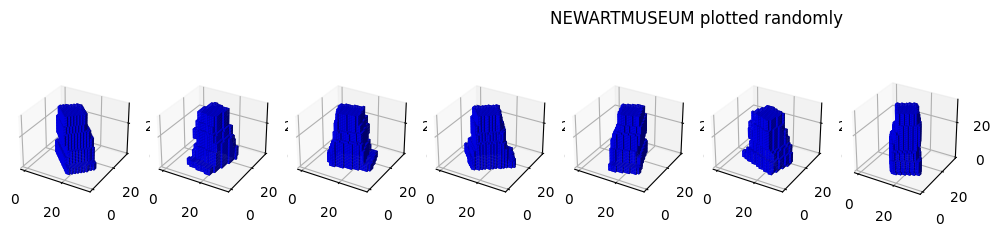

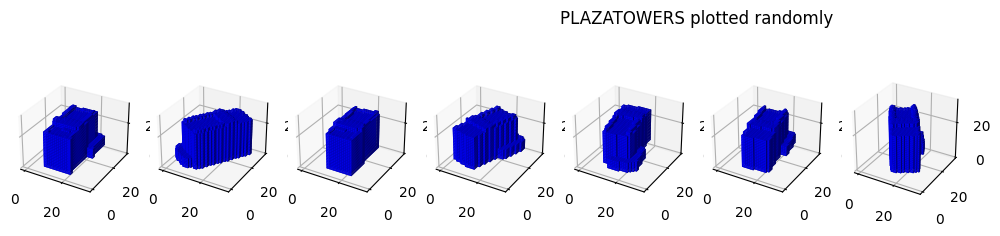

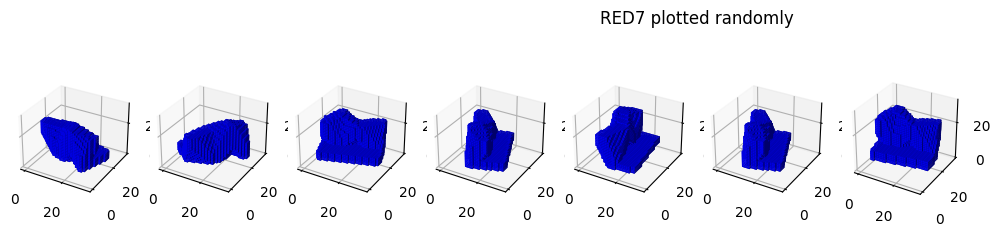

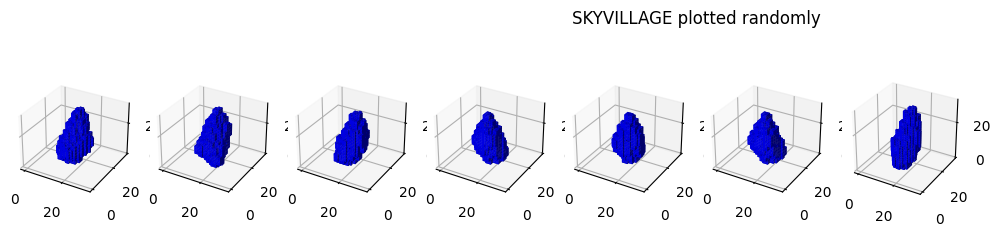

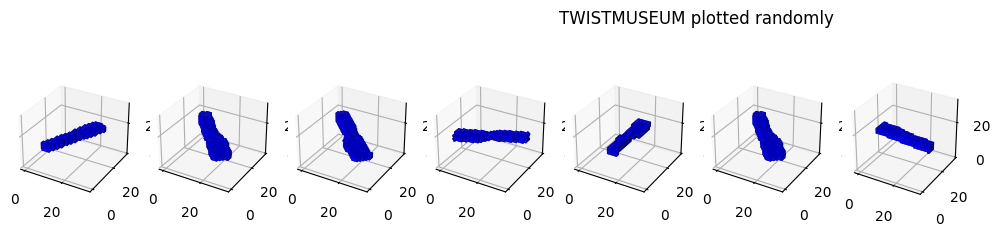

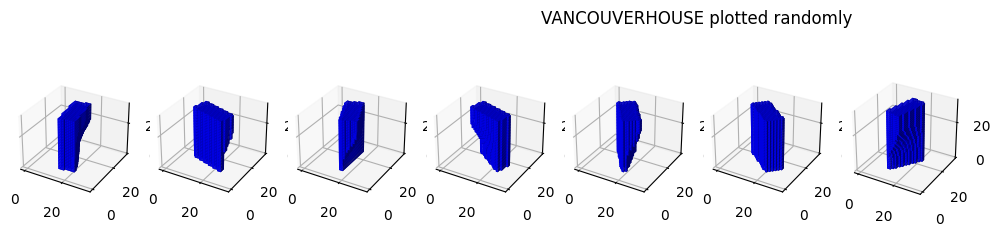

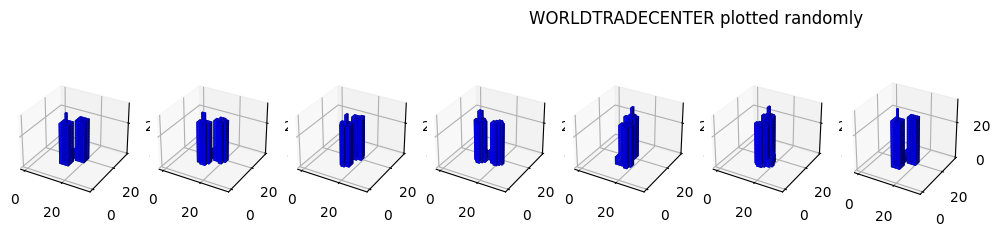

In [1]:
"""Preprocess data that consist of .obj to .binvox"""

from utils import Preprocessor

# preprocessor = Preprocessor(
#     use_to_mirror=True,
#     use_to_rotate=True,
#     use_to_overwrite=True,
#     use_to_plot=True,
#     plot_voxels=True,
#     binvox_resolution=32,
#     rotation_interval=7.2,
#     rotation_max=360,
# )

# preprocessor.preprocess()

In [1]:
import torch
from torch.utils.data import DataLoader

from model import BinvoxDataset, Generator, Discriminator, MassGANTrainer
from config import Config

"""Define dataloader for training"""
dataset = BinvoxDataset(data_path=Config.DATA_PREPROCESSED_DIR_MERGED)
dataloader = DataLoader(
    dataset, 
    batch_size=Config.BATCH_SIZE, 
    shuffle=True,
    drop_last=True,
)

"""Define trainer for the massGAN training"""
trainer = MassGANTrainer(
    generator=Generator(z_dim=Config.Z_DIM),
    discriminator=Discriminator(),
    dataloader=dataloader,
    epochs=Config.EPOCHS,
    loss_function=torch.nn.BCELoss(),
    learning_rate=Config.LEARNING_RATE,
    seed=Config.SEED,
    initial_weights_key=Config.XAVIER,
    pths_dir=Config.PTHS_DIR,
)

Seeds status:
  Seeds set for torch        : 777
  Seeds set for torch on GPU : 777
  Seeds set for numpy        : 777
  Seeds set for random       : 777

Set initial weights from existing .pths:
  generator_pth_path:     pths\2023-10-19 18-20-11.579949\generator_epoch_210.pth
  discriminator_pth_path: pths\2023-10-19 18-20-11.579949\discriminator_epoch_210.pth


-------------------- epoch: 20/1000 running


20/1000 Loss status:
  loss g: 6.515732523600261
  loss d: 0.13451710743208725


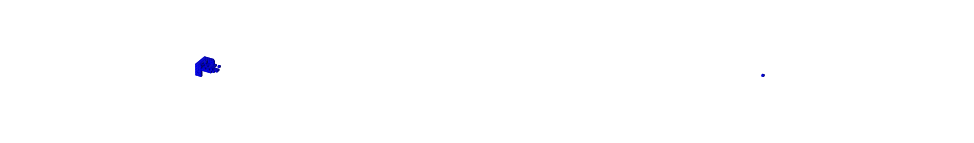

pth saving at 20/1000

-------------------- epoch: 21/1000 running


KeyboardInterrupt: 

In [2]:
"""Training models!!!"""

trainer.train()